<a href="https://colab.research.google.com/github/kecchi986/homework/blob/main/matriks_dan_makrov_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Mengimpor Library yang Dibutuhkan

In [12]:
import numpy as np
import matplotlib.pyplot as plt


    NumPy digunakan untuk operasi numerik dan array/matriks.
    Matplotlib digunakan untuk membuat plot visualisasi data.

2. Data Penjualan Laptop

In [11]:
# Data penjualan laptop dalam 5 tahun terakhir berdasarkan kategori penggunaan
tahun = np.array([2019, 2020, 2021, 2022, 2023])
penjualan_ringan = np.array([500, 520, 540, 580, 620])  # Penjualan penggunaan ringan
penjualan_sedang = np.array([300, 320, 350, 380, 400])  # Penjualan penggunaan sedang
penjualan_berat = np.array([200, 230, 250, 270, 300])   # Penjualan penggunaan berat


    Data penjualan berdasarkan kategori penggunaan selama 5 tahun terakhir diberikan dalam bentuk array.
    Kategori terdiri dari penggunaan ringan, sedang, dan berat.

3. Menghitung Total Penjualan

In [10]:
# Total penjualan tahunan
total_penjualan = penjualan_ringan + penjualan_sedang + penjualan_berat


    Total penjualan tahunan dihitung dengan menjumlahkan penjualan dari setiap kategori.

4. Fungsi Eksponensial Smoothing

In [9]:
# Parameter smoothing untuk eksponensial smoothing (bisa di-tune)
alpha = 0.3

# Fungsi untuk eksponensial smoothing
def eksponensial_smoothing(data, alpha):
    hasil = np.zeros_like(data)
    hasil[0] = data[0]  # Inisialisasi nilai pertama
    for t in range(1, len(data)):
        hasil[t] = alpha * data[t] + (1 - alpha) * hasil[t-1]
    return hasil


    Parameter alpha mengontrol tingkat smoothing, dengan nilai antara 0 dan 1.
    Fungsi eksponensial_smoothing menghaluskan data penjualan dengan menimbang lebih banyak data terbaru.
    Inisialisasi dimulai dengan data pertama (hasil[0] = data[0]) dan prediksi diperbarui pada setiap langkah berikutnya.

5. Menerapkan Eksponensial Smoothing pada Data

In [8]:
# Menghitung prediksi penjualan menggunakan eksponensial smoothing
prediksi_ringan = eksponensial_smoothing(penjualan_ringan, alpha)
prediksi_sedang = eksponensial_smoothing(penjualan_sedang, alpha)
prediksi_berat = eksponensial_smoothing(penjualan_berat, alpha)


    Prediksi penjualan untuk setiap kategori penggunaan dihitung menggunakan fungsi smoothing.

6. Matriks Transisi Markov

In [7]:
# Matriks Transisi Markov
# Keadaan: [Penggunaan Ringan, Penggunaan Sedang, Penggunaan Berat]
states = ["Ringan", "Sedang", "Berat"]
transition_matrix = np.array([[0.6, 0.3, 0.1],  # Probabilitas transisi dari "Ringan"
                              [0.2, 0.5, 0.3],  # Probabilitas transisi dari "Sedang"
                              [0.1, 0.3, 0.6]])  # Probabilitas transisi dari "Berat"


    Matriks transisi menunjukkan probabilitas perubahan dari satu kategori penggunaan ke kategori lain di tahun berikutnya.
    Baris pertama menunjukkan transisi dari "Ringan" ke kategori lainnya.

7. Distribusi Awal

In [6]:
# Distribusi awal berdasarkan total penjualan pada tahun pertama
total_initial = total_penjualan[0]
state_distribution = np.array([penjualan_ringan[0] / total_initial,
                               penjualan_sedang[0] / total_initial,
                               penjualan_berat[0] / total_initial])


    Distribusi awal ditentukan berdasarkan proporsi penjualan dari tahun pertama.

8. Fungsi untuk Simulasi Markov Chain

In [5]:
# Simulasi Markov Chain untuk beberapa tahun ke depan
def simulate_markov_chain(transition_matrix, state_distribution, steps):
    distributions = [state_distribution]
    for _ in range(steps):
        state_distribution = np.dot(state_distribution, transition_matrix)
        distributions.append(state_distribution)
    return distributions


    Fungsi ini mensimulasikan perubahan distribusi kategori penggunaan berdasarkan matriks transisi.
    Pada setiap langkah, distribusi diperbarui menggunakan perkalian matriks.

9. Melakukan Simulasi untuk Beberapa Tahun ke Depan

In [4]:
# Simulasi untuk 4 langkah waktu (tahun berikutnya)
state_distributions = simulate_markov_chain(transition_matrix, state_distribution, 4)


    Simulasi dilakukan selama 4 langkah waktu untuk memproyeksikan perubahan distribusi penggunaan.

10. Visualisasi Hasil Eksponensial Smoothing

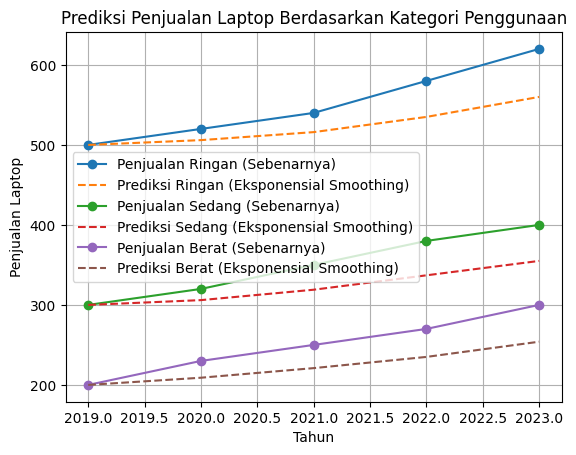

In [3]:
# Menampilkan hasil eksponensial smoothing
plt.plot(tahun, penjualan_ringan, label='Penjualan Ringan (Sebenarnya)', marker='o')
plt.plot(tahun, prediksi_ringan, label='Prediksi Ringan (Eksponensial Smoothing)', linestyle='--')
plt.plot(tahun, penjualan_sedang, label='Penjualan Sedang (Sebenarnya)', marker='o')
plt.plot(tahun, prediksi_sedang, label='Prediksi Sedang (Eksponensial Smoothing)', linestyle='--')
plt.plot(tahun, penjualan_berat, label='Penjualan Berat (Sebenarnya)', marker='o')
plt.plot(tahun, prediksi_berat, label='Prediksi Berat (Eksponensial Smoothing)', linestyle='--')
plt.xlabel('Tahun')
plt.ylabel('Penjualan Laptop')
plt.title('Prediksi Penjualan Laptop Berdasarkan Kategori Penggunaan')
plt.legend()
plt.grid(True)
plt.show()


    Visualisasi data menunjukkan perbandingan antara data penjualan sebenarnya dan hasil prediksi smoothing.

11. Menampilkan Hasil Simulasi Markov Chain

In [2]:
# Menampilkan hasil simulasi Markov Chain
print("\nDistribusi Prediksi Penjualan (Markov Chain):")
for step, distribution in enumerate(state_distributions):
    print(f"Langkah {step}: Ringan={distribution[0]:.2f}, Sedang={distribution[1]:.2f}, Berat={distribution[2]:.2f}")



Distribusi Prediksi Penjualan (Markov Chain):
Langkah 0: Ringan=0.50, Sedang=0.30, Berat=0.20
Langkah 1: Ringan=0.38, Sedang=0.36, Berat=0.26
Langkah 2: Ringan=0.33, Sedang=0.37, Berat=0.30
Langkah 3: Ringan=0.30, Sedang=0.37, Berat=0.33
Langkah 4: Ringan=0.29, Sedang=0.37, Berat=0.34


Distribusi prediksi penjualan untuk setiap kategori penggunaan ditampilkan untuk setiap langkah simulasi.

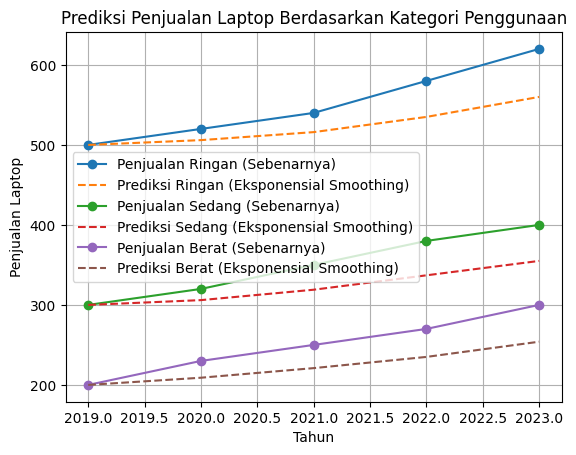


Distribusi Prediksi Penjualan (Markov Chain):
Langkah 0: Ringan=0.50, Sedang=0.30, Berat=0.20
Langkah 1: Ringan=0.38, Sedang=0.36, Berat=0.26
Langkah 2: Ringan=0.33, Sedang=0.37, Berat=0.30
Langkah 3: Ringan=0.30, Sedang=0.37, Berat=0.33
Langkah 4: Ringan=0.29, Sedang=0.37, Berat=0.34


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data penjualan laptop dalam 5 tahun terakhir berdasarkan kategori penggunaan
tahun = np.array([2019, 2020, 2021, 2022, 2023])
penjualan_ringan = np.array([500, 520, 540, 580, 620])  # Penjualan penggunaan ringan
penjualan_sedang = np.array([300, 320, 350, 380, 400])  # Penjualan penggunaan sedang
penjualan_berat = np.array([200, 230, 250, 270, 300])   # Penjualan penggunaan berat

# Total penjualan tahunan
total_penjualan = penjualan_ringan + penjualan_sedang + penjualan_berat

# Parameter smoothing untuk eksponensial smoothing (bisa di-tune)
alpha = 0.3

# Fungsi untuk eksponensial smoothing
def eksponensial_smoothing(data, alpha):
    hasil = np.zeros_like(data)
    hasil[0] = data[0]  # Inisialisasi nilai pertama
    for t in range(1, len(data)):
        hasil[t] = alpha * data[t] + (1 - alpha) * hasil[t-1]
    return hasil

# Menghitung prediksi penjualan menggunakan eksponensial smoothing
prediksi_ringan = eksponensial_smoothing(penjualan_ringan, alpha)
prediksi_sedang = eksponensial_smoothing(penjualan_sedang, alpha)
prediksi_berat = eksponensial_smoothing(penjualan_berat, alpha)

# Matriks Transisi Markov
# Keadaan: [Penggunaan Ringan, Penggunaan Sedang, Penggunaan Berat]
states = ["Ringan", "Sedang", "Berat"]
transition_matrix = np.array([[0.6, 0.3, 0.1],  # Probabilitas transisi dari "Ringan"
                              [0.2, 0.5, 0.3],  # Probabilitas transisi dari "Sedang"
                              [0.1, 0.3, 0.6]])  # Probabilitas transisi dari "Berat"

# Distribusi awal berdasarkan total penjualan pada tahun pertama
total_initial = total_penjualan[0]
state_distribution = np.array([penjualan_ringan[0] / total_initial,
                               penjualan_sedang[0] / total_initial,
                               penjualan_berat[0] / total_initial])

# Simulasi Markov Chain untuk beberapa tahun ke depan
def simulate_markov_chain(transition_matrix, state_distribution, steps):
    distributions = [state_distribution]
    for _ in range(steps):
        state_distribution = np.dot(state_distribution, transition_matrix)
        distributions.append(state_distribution)
    return distributions

# Simulasi untuk 4 langkah waktu (tahun berikutnya)
state_distributions = simulate_markov_chain(transition_matrix, state_distribution, 4)

# Menampilkan hasil eksponensial smoothing
plt.plot(tahun, penjualan_ringan, label='Penjualan Ringan (Sebenarnya)', marker='o')
plt.plot(tahun, prediksi_ringan, label='Prediksi Ringan (Eksponensial Smoothing)', linestyle='--')
plt.plot(tahun, penjualan_sedang, label='Penjualan Sedang (Sebenarnya)', marker='o')
plt.plot(tahun, prediksi_sedang, label='Prediksi Sedang (Eksponensial Smoothing)', linestyle='--')
plt.plot(tahun, penjualan_berat, label='Penjualan Berat (Sebenarnya)', marker='o')
plt.plot(tahun, prediksi_berat, label='Prediksi Berat (Eksponensial Smoothing)', linestyle='--')
plt.xlabel('Tahun')
plt.ylabel('Penjualan Laptop')
plt.title('Prediksi Penjualan Laptop Berdasarkan Kategori Penggunaan')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan hasil simulasi Markov Chain
print("\nDistribusi Prediksi Penjualan (Markov Chain):")
for step, distribution in enumerate(state_distributions):
    print(f"Langkah {step}: Ringan={distribution[0]:.2f}, Sedang={distribution[1]:.2f}, Berat={distribution[2]:.2f}")


1. Hasil Eksponensial Smoothing (Perataan Eksponensial)

    Tujuan: Eksponensial smoothing digunakan untuk membuat prediksi tren penjualan di masa depan dengan memberikan bobot yang lebih besar pada data terbaru.

    Hasil Visualisasi:
        Plot menunjukkan data penjualan sebenarnya dari laptop berdasarkan kategori penggunaan (Ringan, Sedang, dan Berat) selama 5 tahun, serta garis prediksi menggunakan eksponensial smoothing.
        Garis prediksi mengikuti data tren dengan pola yang lebih halus, memberikan gambaran umum apakah ada peningkatan atau penurunan pada setiap kategori penggunaan selama periode waktu tersebut.
        Dari hasil plot:
            Penjualan Penggunaan Ringan cenderung meningkat secara konsisten.
            Penjualan Penggunaan Sedang menunjukkan peningkatan yang moderat.
            Penjualan Penggunaan Berat juga mengalami peningkatan, meskipun pada kecepatan yang lebih lambat dibandingkan kategori lain.

    Interpretasi: Eksponensial smoothing memberikan prediksi bahwa tren penjualan secara keseluruhan cenderung naik, meskipun dengan tingkat pertumbuhan yang berbeda untuk setiap kategori penggunaan. Prediksi ini berguna untuk memahami permintaan berdasarkan pola historis.

2. Hasil Matriks Transisi Markov (Simulasi Markov Chain)

    Tujuan: Rantai Markov digunakan untuk memprediksi peralihan antar kategori penggunaan dari tahun ke tahun berdasarkan probabilitas transisi.

    Distribusi Awal: Distribusi awal ditentukan berdasarkan proporsi penjualan kategori penggunaan pada tahun pertama (2019). Dalam contoh ini, proporsi penggunaan ringan, sedang, dan berat dihitung dari data penjualan pada tahun tersebut.

    Hasil Simulasi:
        Dengan menggunakan matriks transisi, simulasi prediksi perubahan distribusi penjualan antar kategori penggunaan dilakukan selama beberapa langkah waktu (tahun).
        Contoh Hasil:
            Langkah 0 (Tahun awal): Distribusi menunjukkan proporsi penggunaan ringan, sedang, dan berat.
            Langkah 1 (1 tahun kemudian) hingga Langkah 4 (4 tahun kemudian): Distribusi menunjukkan bagaimana kemungkinan kategori penggunaan berubah berdasarkan matriks transisi. Perubahan ini menunjukkan peralihan dari satu kategori ke kategori lain selama beberapa periode.

    Interpretasi:
        Jika nilai probabilitas transisi dari "Ringan" ke "Sedang" tinggi, hasil simulasi dapat menunjukkan peningkatan proporsi pengguna dalam kategori sedang.
        Sebaliknya, jika probabilitas untuk bertahan di satu kategori tinggi (misalnya 60% untuk tetap dalam "Ringan"), maka distribusi tidak banyak berubah di masa depan.
        Dari hasil simulasi, kita dapat melihat apakah pengguna cenderung "berpindah" kategori penggunaan dari waktu ke waktu atau tetap dalam kategori mereka.

3. Menggabungkan Hasil dari Eksponensial Smoothing dan Markov Chain

    Eksponensial Smoothing menunjukkan prediksi tren jangka panjang untuk penjualan berdasarkan data historis.
    Markov Chain memberikan wawasan tentang bagaimana pengguna dapat "bermigrasi" di antara kategori penggunaan berdasarkan probabilitas transisi.
    Kombinasi Analisis:
        Dengan menggabungkan kedua metode ini, kita dapat memperkirakan tidak hanya tren penjualan secara keseluruhan tetapi juga perubahan pola penggunaan yang dapat mempengaruhi penjualan masa depan. Misalnya, jika ada kecenderungan pengguna untuk beralih ke penggunaan yang lebih berat, ini bisa menjadi peluang untuk perusahaan memfokuskan pemasaran atau peningkatan produk mereka ke kategori tersebut.

Contoh Kesimpulan Hasil:

    Penjualan kategori penggunaan ringan cenderung meningkat berdasarkan tren historis. Namun, jika probabilitas transisi ke kategori lain cukup besar, proporsi pengguna dalam kategori ini mungkin berkurang di masa depan.
    Penggunaan sedang dan berat juga menunjukkan peningkatan, tetapi laju pertumbuhan mungkin bervariasi tergantung pada data dan probabilitas transisi.
    Hasil ini memberikan panduan dalam strategi bisnis, misalnya untuk menentukan segmen pasar yang akan difokuskan berdasarkan prediksi perubahan distribusi pengguna.